In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from decimal import Decimal

# Study data files
cleaned_data_path = "Data/data_cleaning.csv"
stacked_data_path = "Data/data_cleaning_stacked.csv"

# Read the mouse data and the study results
movie_clean = pd.read_csv(cleaned_data_path, index_col=0)
movie_stacked = pd.read_csv(stacked_data_path, index_col=0)

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Bin data by decade
decade_bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
decade_names = ['1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

### Cleaned Data

In [3]:
# Display the data table for cleaned data
movie_clean.head()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$128,831,540.56"
1,tt0017136,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$17,839,651.48"
2,tt0017354,The Sea Beast,1926,1926-01-15,"Action, Adventure, Fantasy",136,USA,English,Millard Webb,"Herman Melville, Bess Meredyth",Warner Bros.,"John Barrymore, Dolores Costello, George O'Har...",6.50,126,"$814,000.00","$11,548,084.63"
3,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.50,152716,"$19,181.00","$316,873.91"
4,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.50,197969,"$163,577.00","$2,955,059.69"


### Stacked Data Analysis

In [4]:
# Remove leading space in genre
movie_stacked['Genre'] = movie_stacked['Genre'].str.lstrip()

# Display the data table for stacked data
movie_stacked.head()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Drama,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$131,165,937.89"
1,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Romance,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$131,165,937.89"
2,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,War,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$131,165,937.89"
3,tt0017136,Metropolis,1927,1927-02-06,Drama,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$18,162,901.79"
4,tt0017136,Metropolis,1927,1927-02-06,Sci-Fi,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$18,162,901.79"


In [45]:
# Cut stacked data by decade
movie_stacked["Decade"] = pd.cut(movie_stacked["Year"], decade_bins, labels=decade_names, include_lowest=True)
movie_stacked.head()

# Output file to csv
movie_stacked.to_csv(r'Data\movie_stacked.csv', index=False)

In [6]:
# Group stacked data by decade and count how many records
stacked_decade = movie_stacked.groupby('Decade')
stacked_decade.count()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
Decade,,,,,,,,,,,,,,,,
1920-1929,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1930-1939,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1940-1949,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
1950-1959,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
1960-1969,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1970-1979,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572
1980-1989,3108,3108,3108,3108,3108,3108,3108,3108,3108,3108,3085,3108,3108,3108,3108,3108
1990-1999,4374,4374,4374,4374,4374,4374,4374,4371,4374,4372,4363,4374,4374,4374,4374,4374
2000-2009,5459,5459,5459,5459,5459,5459,5459,5447,5457,5449,5402,5457,5459,5459,5459,5459


In [7]:
# Create a variable for each decade with more than 500 records
decade_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
decade_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
decade_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
decade_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
decade_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

## Create DataFrame and Bar Chart for Each Decade

### 1970's

In [8]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_70_groupby = decade_70.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_70_df = pd.DataFrame(decade_70_groupby)
decade_70_df['%'] = ((decade_70_df['Decade'] / decade_70_df['Decade'].sum())*100).round(1).astype(float)


decade_70_df.reset_index()

,Genre,Decade,%
0,Drama,137,24.00
1,Comedy,87,15.20
2,Action,41,7.20
3,Romance,40,7.00
4,Adventure,39,6.80
5,Crime,38,6.60
6,Thriller,38,6.60
7,Mystery,21,3.70
8,Sci-Fi,19,3.30
9,Sport,17,3.00


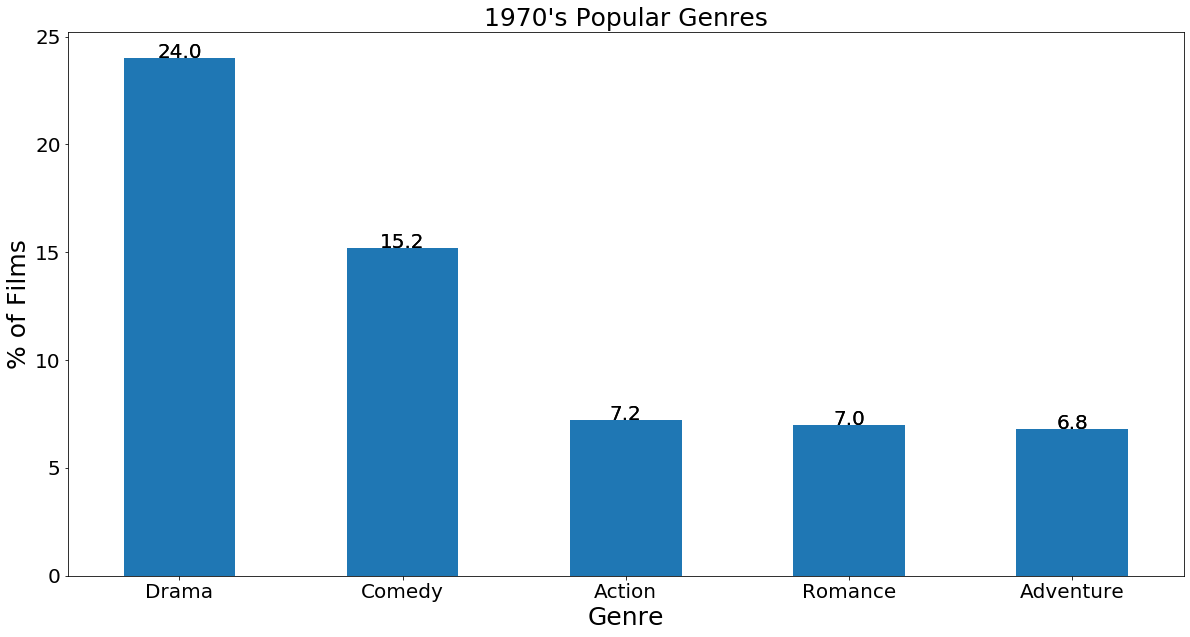

In [9]:
# Plot bar chart
ax = decade_70_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_70_df.columns:
    for id, val in enumerate(decade_70_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1970's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 1980's

In [10]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_80_groupby = decade_80.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_80_df = pd.DataFrame(decade_80_groupby)
decade_80_df['%'] = ((decade_80_df['Decade'] / decade_80_df['Decade'].sum())*100).round(1).astype(float)


decade_80_df.reset_index()

,Genre,Decade,%
0,Drama,654,21.00
1,Comedy,576,18.50
2,Action,274,8.80
3,Crime,253,8.10
4,Romance,245,7.90
5,Adventure,178,5.70
6,Thriller,174,5.60
7,Horror,146,4.70
8,Fantasy,99,3.20
9,Mystery,90,2.90


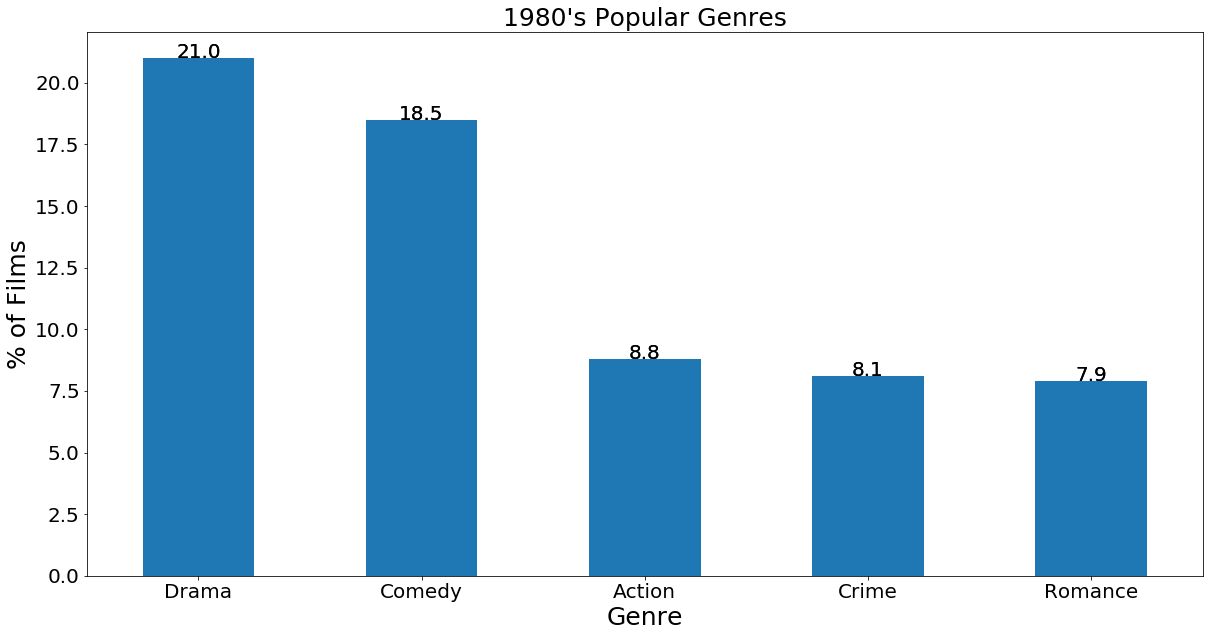

In [11]:
# Plot bar chart
ax = decade_80_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_80_df.columns:
    for id, val in enumerate(decade_80_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1980's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 1990's

In [12]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_90_groupby = decade_90.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_90_df = pd.DataFrame(decade_90_groupby)
decade_90_df['%'] = ((decade_90_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_90_df.reset_index()

,Genre,Decade,%
0,Drama,1043,23.80
1,Comedy,832,19.00
2,Romance,385,8.80
3,Crime,383,8.80
4,Action,340,7.80
5,Thriller,262,6.00
6,Adventure,223,5.10
7,Family,144,3.30
8,Mystery,119,2.70
9,Horror,113,2.60


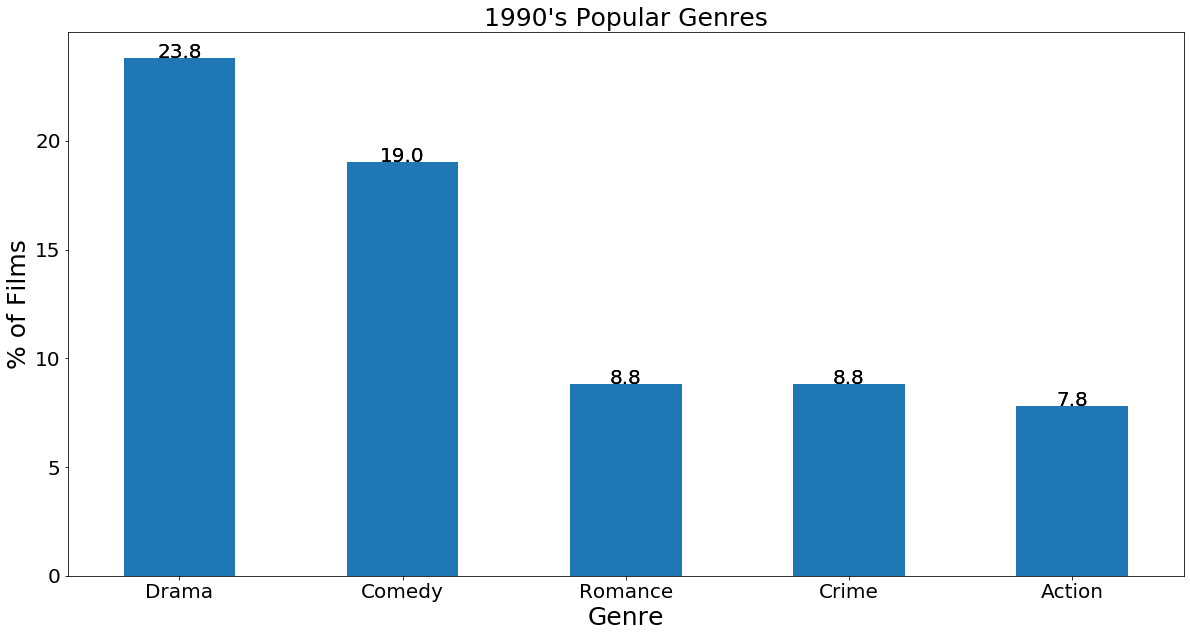

In [13]:
# Plot bar chart
ax = decade_90_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_90_df.columns:
    for id, val in enumerate(decade_90_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1990's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 2000's

In [14]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_00_groupby = decade_00.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_00_df = pd.DataFrame(decade_00_groupby)
decade_00_df['%'] = ((decade_00_df['Decade'] / decade_00_df['Decade'].sum())*100).round(1).astype(float)


decade_00_df.reset_index()

,Genre,Decade,%
0,Drama,1230,22.50
1,Comedy,972,17.80
2,Romance,518,9.50
3,Action,439,8.00
4,Crime,416,7.60
5,Adventure,326,6.00
6,Thriller,284,5.20
7,Mystery,196,3.60
8,Family,163,3.00
9,Horror,159,2.90


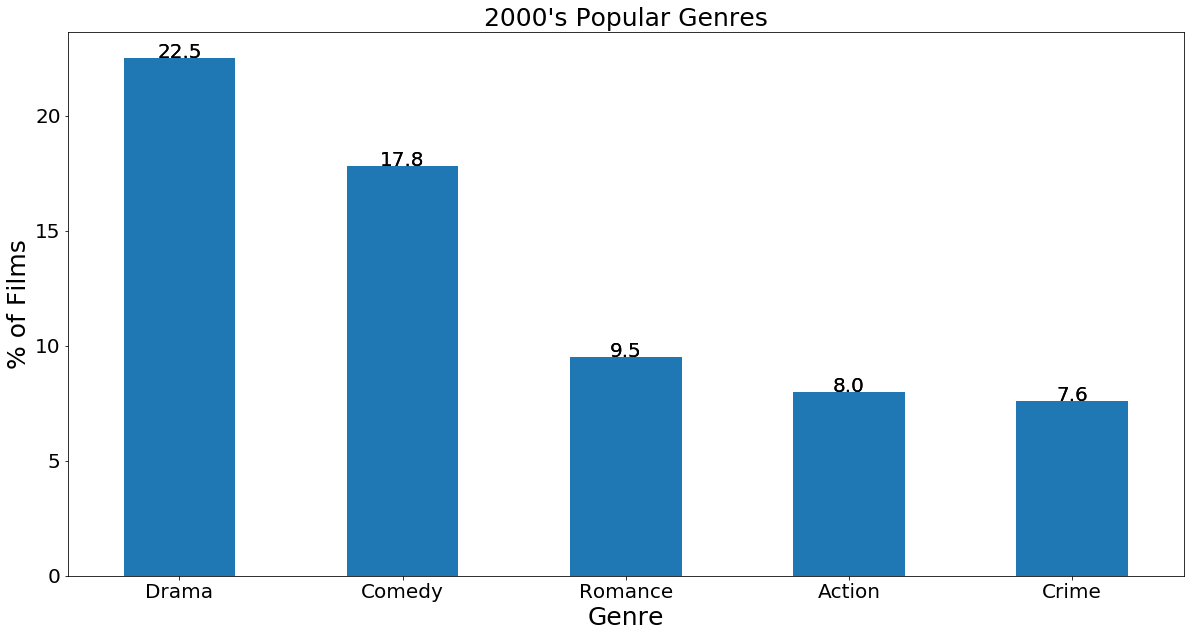

In [15]:
# Plot bar chart
ax = decade_00_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_00_df.columns:
    for id, val in enumerate(decade_00_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2000's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 2010's

In [16]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_10_groupby = decade_10.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_10_df = pd.DataFrame(decade_10_groupby)
decade_10_df['%'] = ((decade_10_df['Decade'] / decade_10_df['Decade'].sum())*100).round(1).astype(float)


decade_10_df.reset_index()

,Genre,Decade,%
0,Drama,1178,23.30
1,Comedy,803,15.90
2,Action,521,10.30
3,Romance,350,6.90
4,Thriller,344,6.80
5,Adventure,326,6.40
6,Crime,296,5.90
7,Horror,200,4.00
8,Biography,193,3.80
9,Mystery,155,3.10


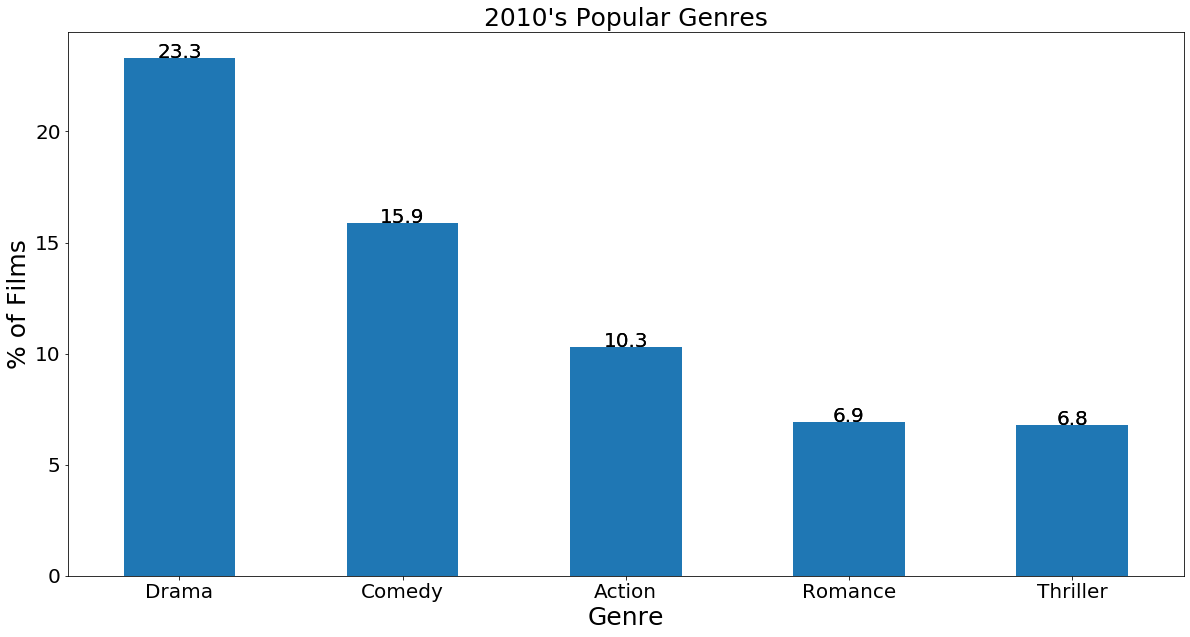

In [17]:
# Plot bar chart
ax = decade_10_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_10_df.columns:
    for id, val in enumerate(decade_10_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2010's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### Financial Data by Genre

## Rating by Genre

In [18]:
# Create a variable for each decade with more than 500 records
rating_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
rating_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
rating_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
rating_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
rating_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

### 1970's Rating

In [19]:
rating_70_groupby = rating_70.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_70_df = pd.DataFrame(rating_70_groupby)

rating_70_df.reset_index()

,Genre,Avg Rating
0,Biography,7.59
1,War,7.08
2,Crime,7.07
3,Musical,7.04
4,History,6.96
5,Animation,6.90
6,Music,6.85
7,Western,6.82
8,Mystery,6.81
9,Drama,6.78


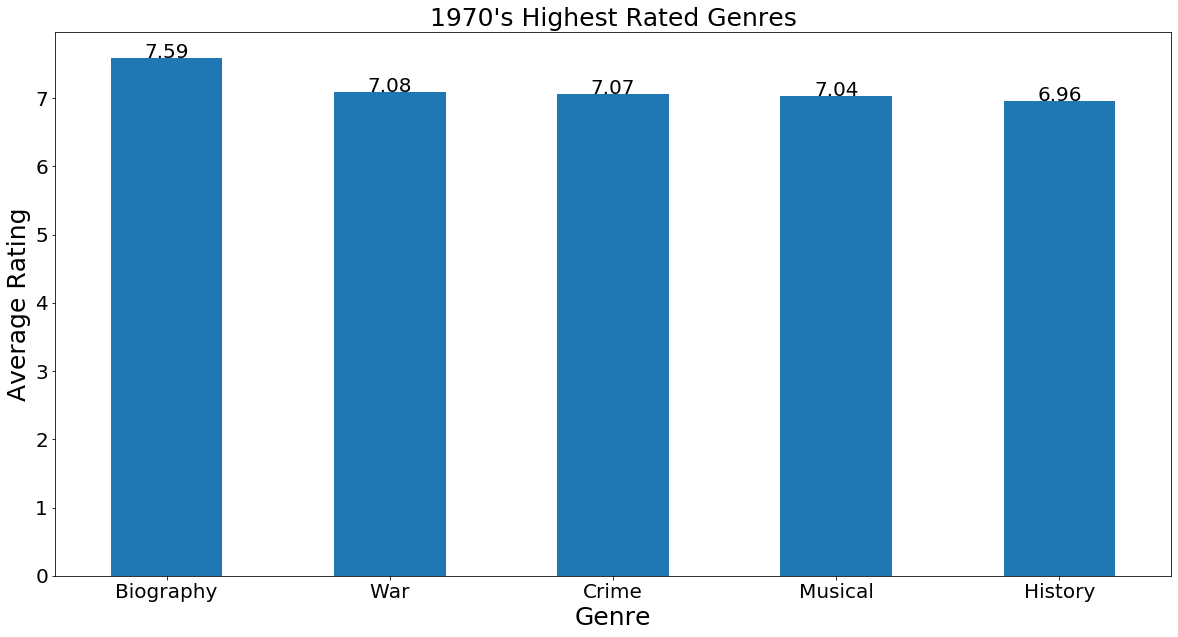

In [20]:
# Plot bar chart
ax = rating_70_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_70_df.columns:
    for id, val in enumerate(rating_70_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1970's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 1980's Rating

In [21]:
rating_80_groupby = rating_80.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_80_df = pd.DataFrame(rating_80_groupby)

rating_80_df.reset_index()

,Genre,Avg Rating
0,History,7.11
1,Biography,6.96
2,Animation,6.82
3,War,6.40
4,Drama,6.39
5,Adventure,6.20
6,Family,6.19
7,Crime,6.18
8,Music,6.17
9,Sci-Fi,6.15


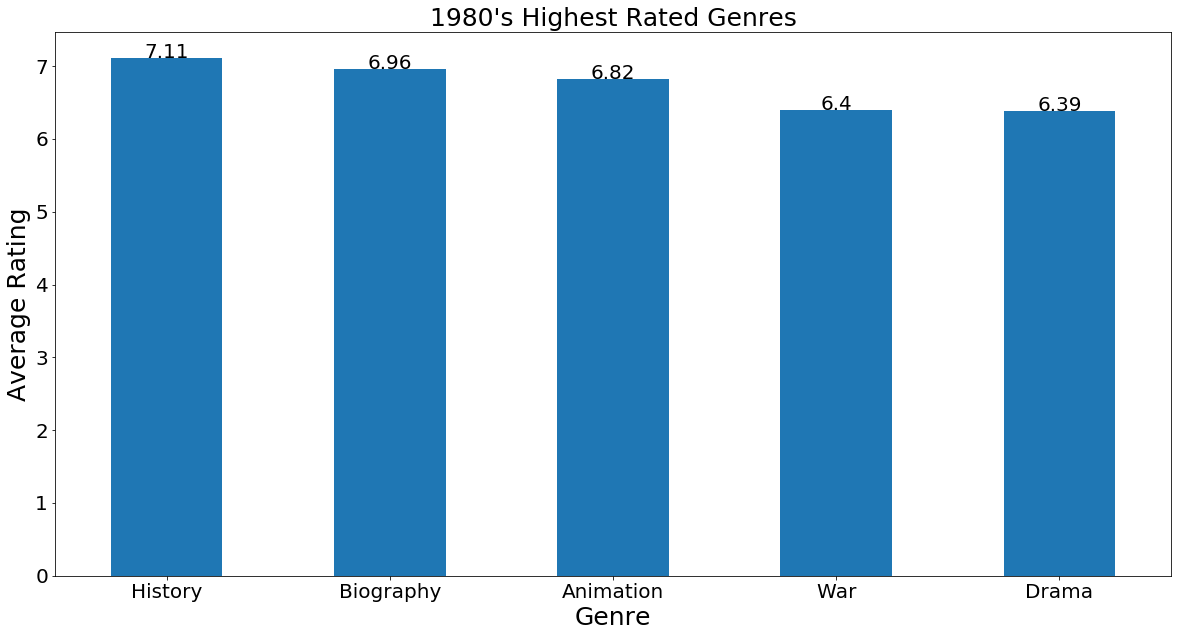

In [22]:
# Plot bar chart
ax = rating_80_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_80_df.columns:
    for id, val in enumerate(rating_80_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1980's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 1990's Rating

In [23]:
rating_90_groupby = rating_90.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_90_df = pd.DataFrame(rating_90_groupby)

rating_90_df.reset_index()

,Genre,Avg Rating
0,History,7.05
1,Biography,6.97
2,Animation,6.76
3,War,6.54
4,Music,6.52
5,Western,6.50
6,Drama,6.50
7,Mystery,6.36
8,Crime,6.29
9,Romance,6.26


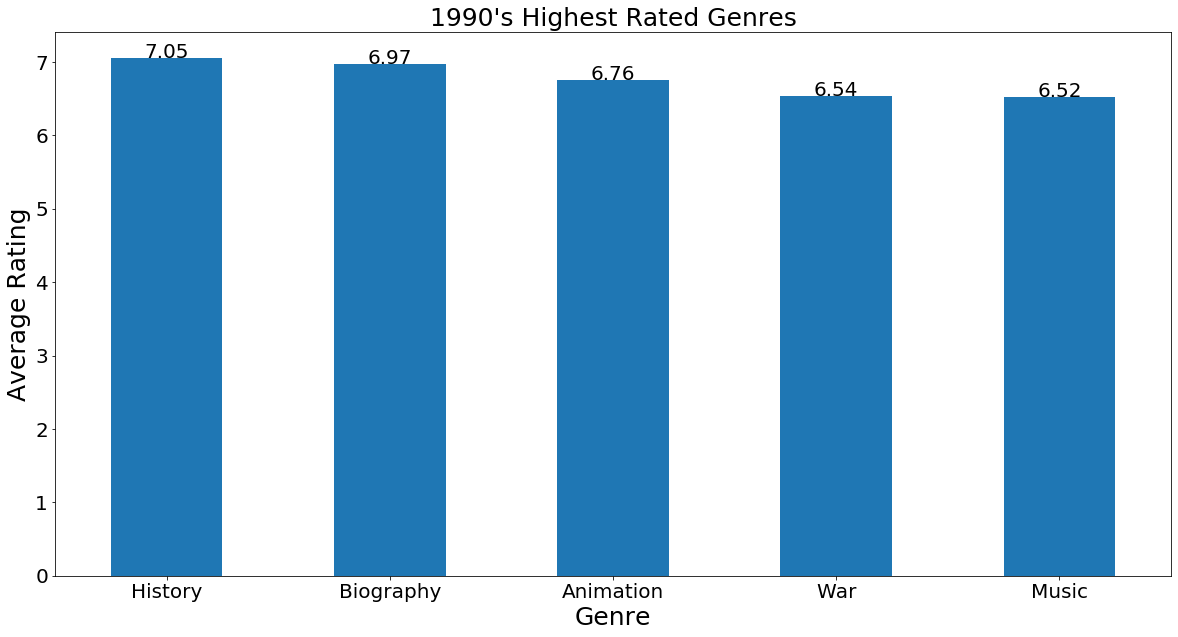

In [24]:
# Plot bar chart
ax = rating_90_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_90_df.columns:
    for id, val in enumerate(rating_90_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1990's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 2000's Rating

In [25]:
rating_00_groupby = rating_00.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_00_df = pd.DataFrame(rating_00_groupby)

rating_00_df.reset_index()

,Genre,Avg Rating
0,History,6.99
1,Biography,6.98
2,War,6.73
3,Drama,6.44
4,Animation,6.32
5,Crime,6.21
6,Thriller,6.17
7,Sci-Fi,6.16
8,Mystery,6.15
9,Sport,6.13


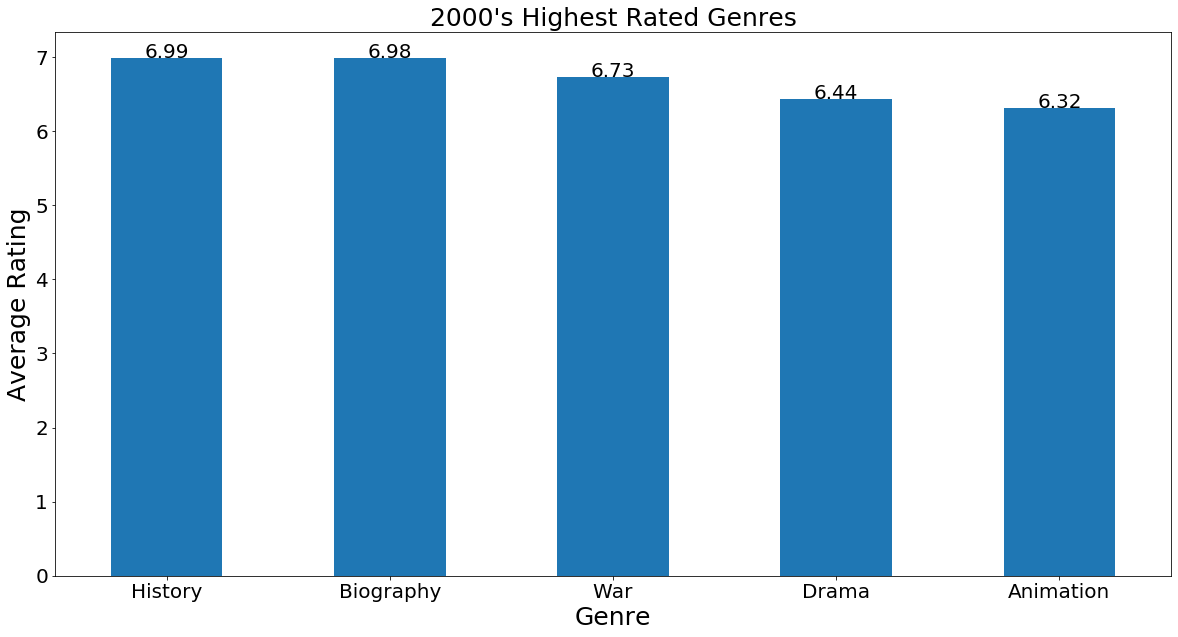

In [26]:
# Plot bar chart
ax = rating_00_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_00_df.columns:
    for id, val in enumerate(rating_00_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2000's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 2010's Rating

In [27]:
rating_10_groupby = rating_10.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_10_df = pd.DataFrame(rating_10_groupby)

rating_10_df.reset_index()

,Genre,Avg Rating
0,Biography,6.89
1,History,6.65
2,Sport,6.57
3,Western,6.51
4,Animation,6.51
5,Adventure,6.38
6,Drama,6.34
7,Music,6.28
8,Sci-Fi,6.26
9,Crime,6.18


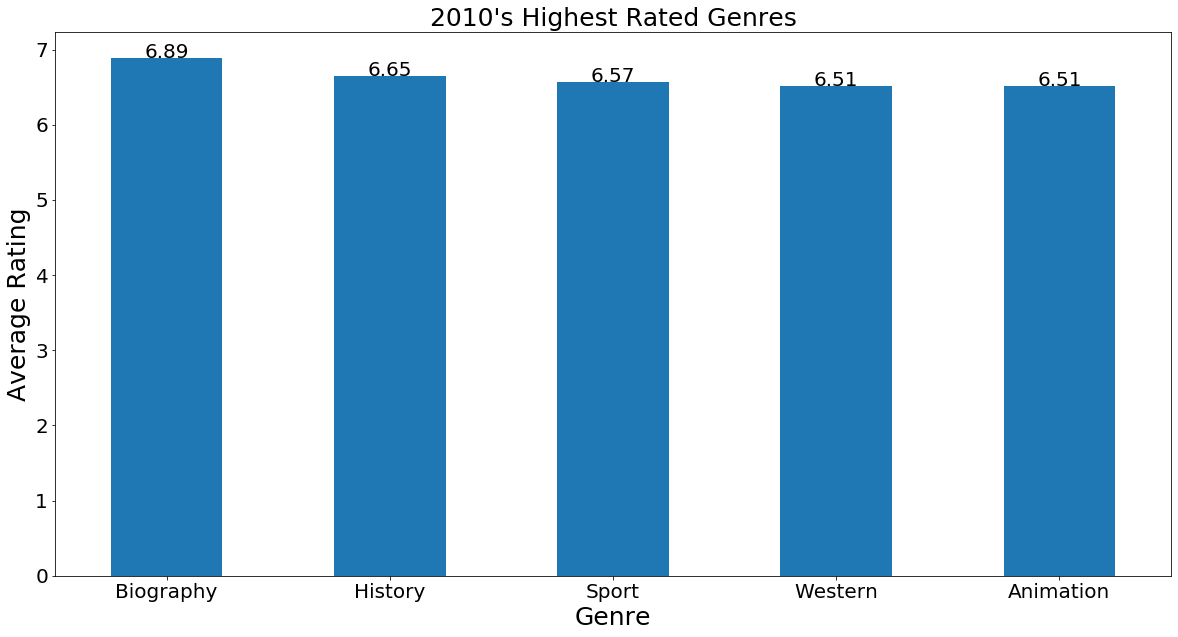

In [28]:
# Plot bar chart
ax = rating_10_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_10_df.columns:
    for id, val in enumerate(rating_10_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2010's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

## Rating by Genre

### 1970's Rating by Genre

In [29]:
decade_70_combined = pd.concat([decade_70_df, rating_70_df], axis=1)
decade_70_combined[['%', "Avg Rating"]]
decade_70_combined

,Decade,%,Avg Rating
Drama,137,24.00,6.78
Comedy,87,15.20,6.51
Action,41,7.20,6.46
Romance,40,7.00,6.39
Adventure,39,6.80,6.52
Crime,38,6.60,7.07
Thriller,38,6.60,6.76
Mystery,21,3.70,6.81
Sci-Fi,19,3.30,6.35
Sport,17,3.00,5.99


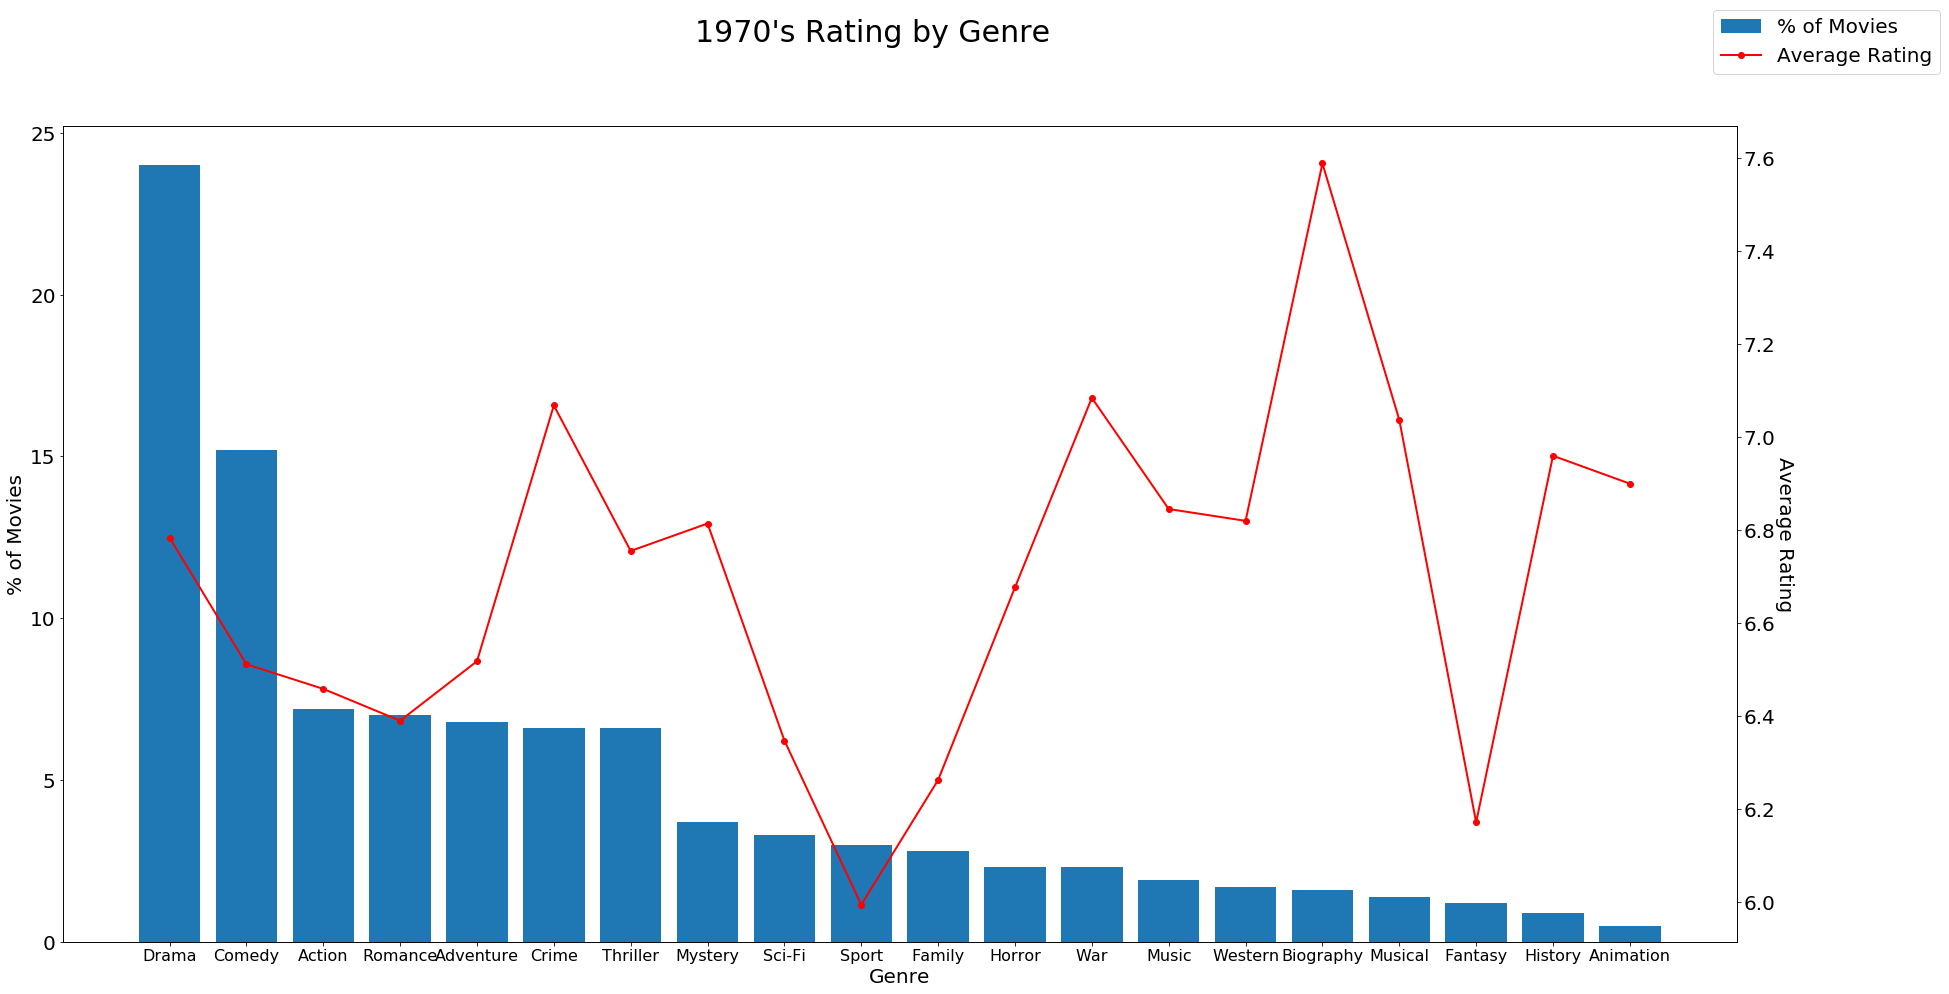

In [30]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_70_combined.index, decade_70_combined["%"], label='% of Movies')
ax2.plot(decade_70_combined.index, decade_70_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1970's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_70_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 1980's Rating by Genre

In [31]:
decade_80_combined = pd.concat([decade_80_df, rating_80_df], axis=1)
decade_80_combined[['%', "Avg Rating"]]
decade_80_combined

,Decade,%,Avg Rating
Drama,654,21.00,6.39
Comedy,576,18.50,6.01
Action,274,8.80,5.99
Crime,253,8.10,6.18
Romance,245,7.90,6.15
Adventure,178,5.70,6.20
Thriller,174,5.60,6.06
Horror,146,4.70,5.98
Fantasy,99,3.20,6.05
Mystery,90,2.90,6.08


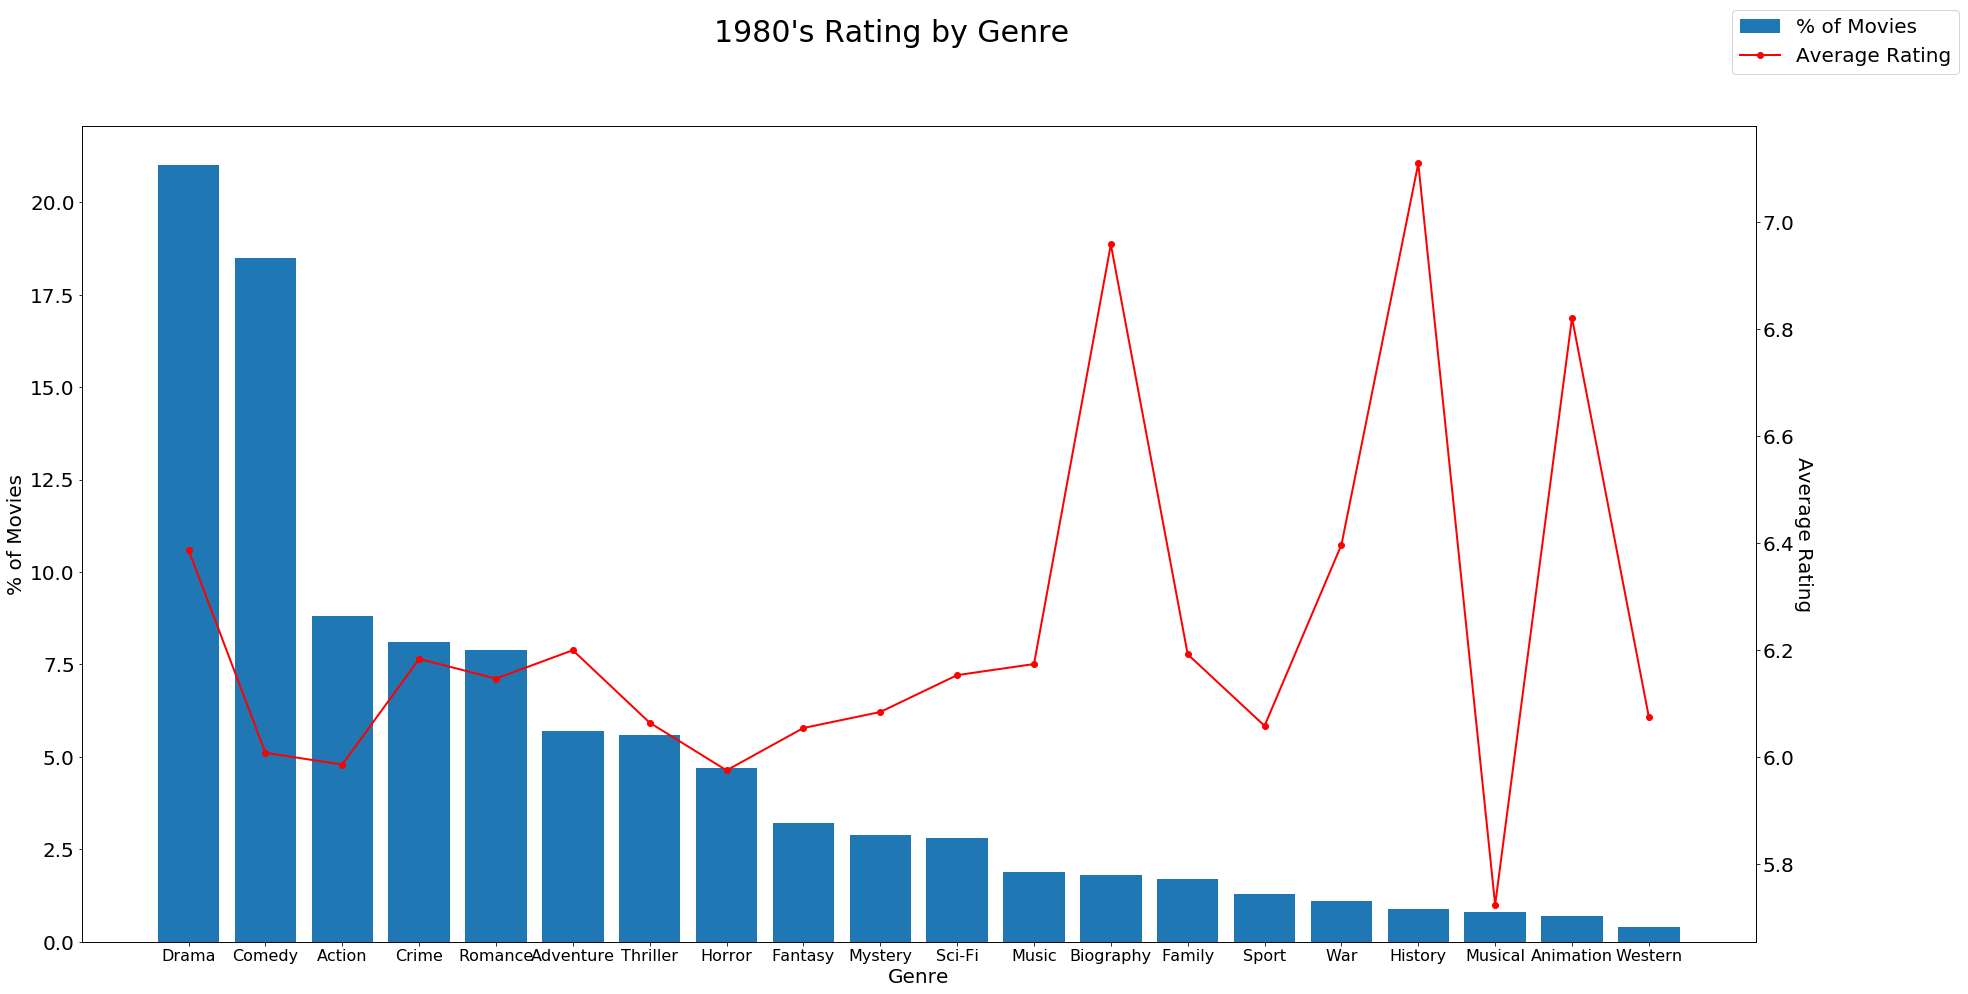

In [32]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_80_combined.index, decade_80_combined["%"], label='% of Movies')
ax2.plot(decade_80_combined.index, decade_80_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1980's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_80_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 1990's Rating by Genre

In [33]:
decade_90_combined = pd.concat([decade_90_df, rating_90_df], axis=1)
decade_90_combined[['%', "Avg Rating"]]
decade_90_combined

,Decade,%,Avg Rating
Drama,1043,23.80,6.50
Comedy,832,19.00,6.03
Romance,385,8.80,6.26
Crime,383,8.80,6.29
Action,340,7.80,5.95
Thriller,262,6.00,6.22
Adventure,223,5.10,6.10
Family,144,3.30,5.75
Mystery,119,2.70,6.36
Horror,113,2.60,5.72


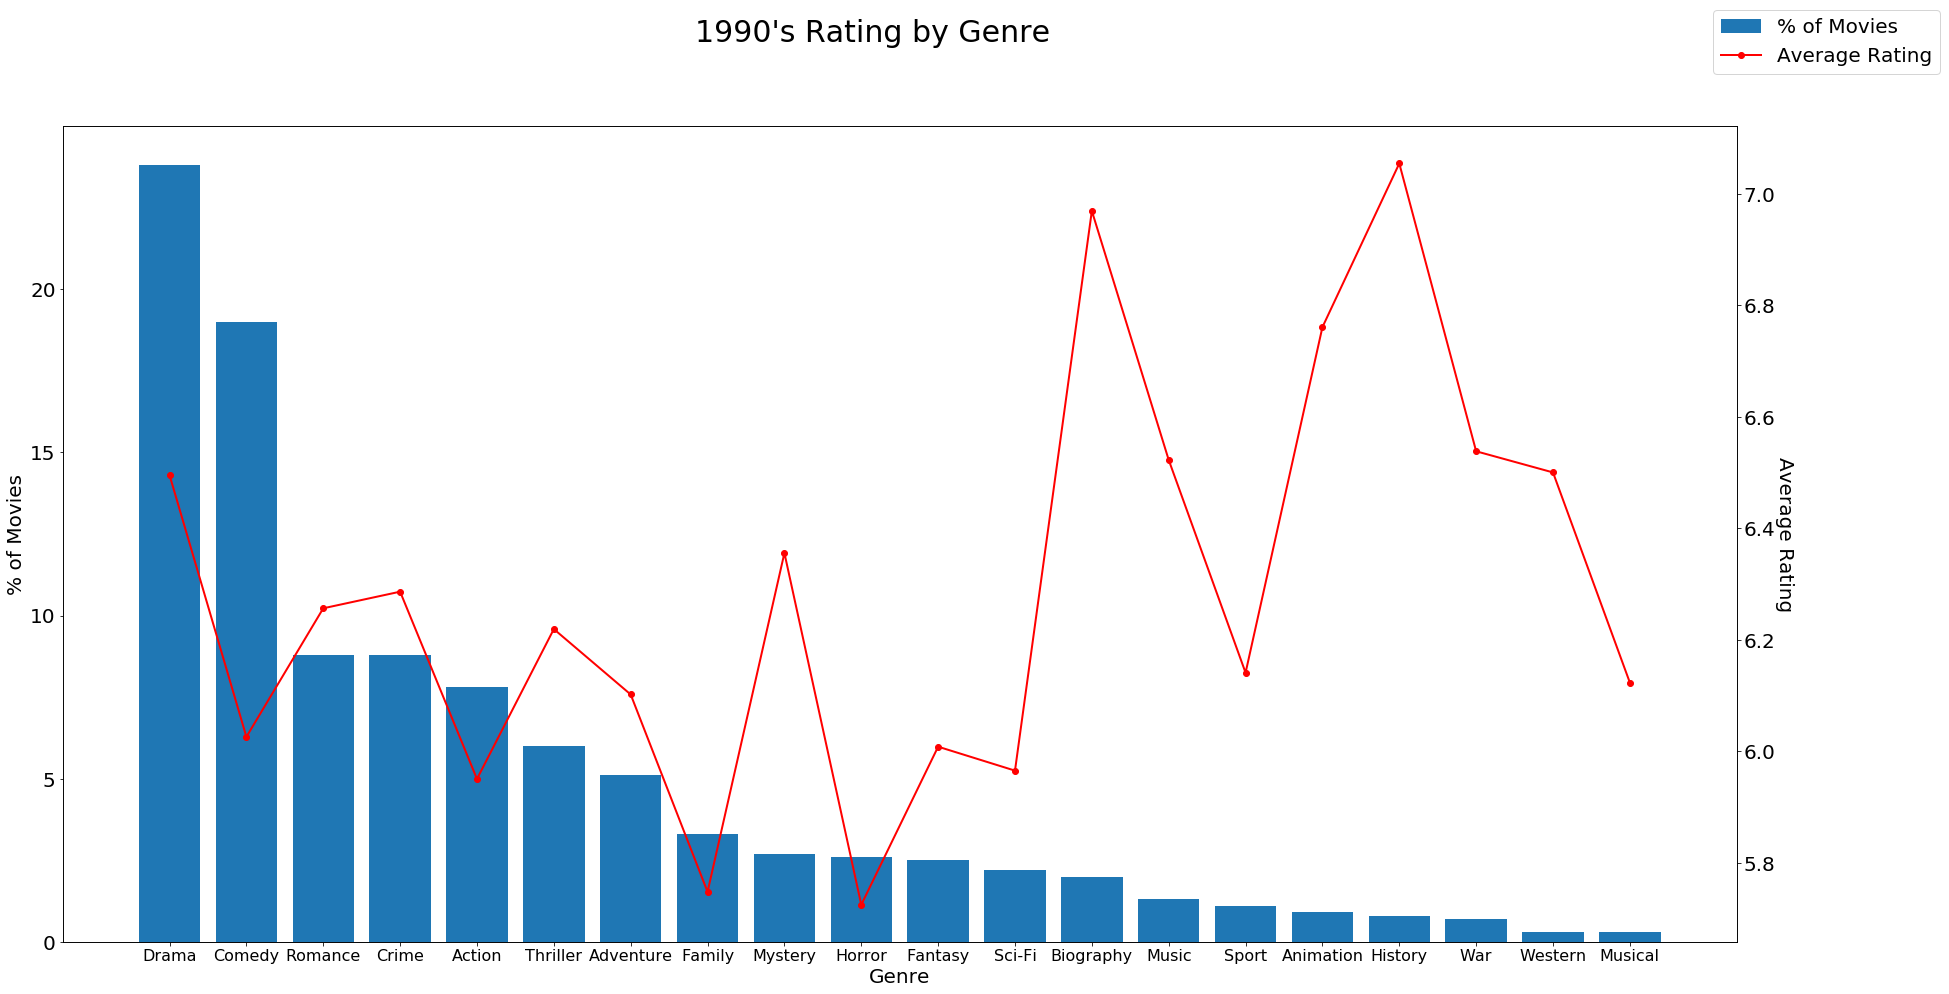

In [34]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_90_combined.index, decade_90_combined["%"], label='% of Movies')
ax2.plot(decade_90_combined.index, decade_90_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1990's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_90_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 2000's Rating by Genre

In [35]:
decade_00_combined = pd.concat([decade_00_df, rating_00_df], axis=1)
decade_00_combined[['%', "Avg Rating"]]
decade_00_combined

,Decade,%,Avg Rating
Drama,1230,22.50,6.44
Comedy,972,17.80,5.89
Romance,518,9.50,6.10
Action,439,8.00,5.99
Crime,416,7.60,6.21
Adventure,326,6.00,6.12
Thriller,284,5.20,6.17
Mystery,196,3.60,6.15
Family,163,3.00,5.73
Horror,159,2.90,5.62


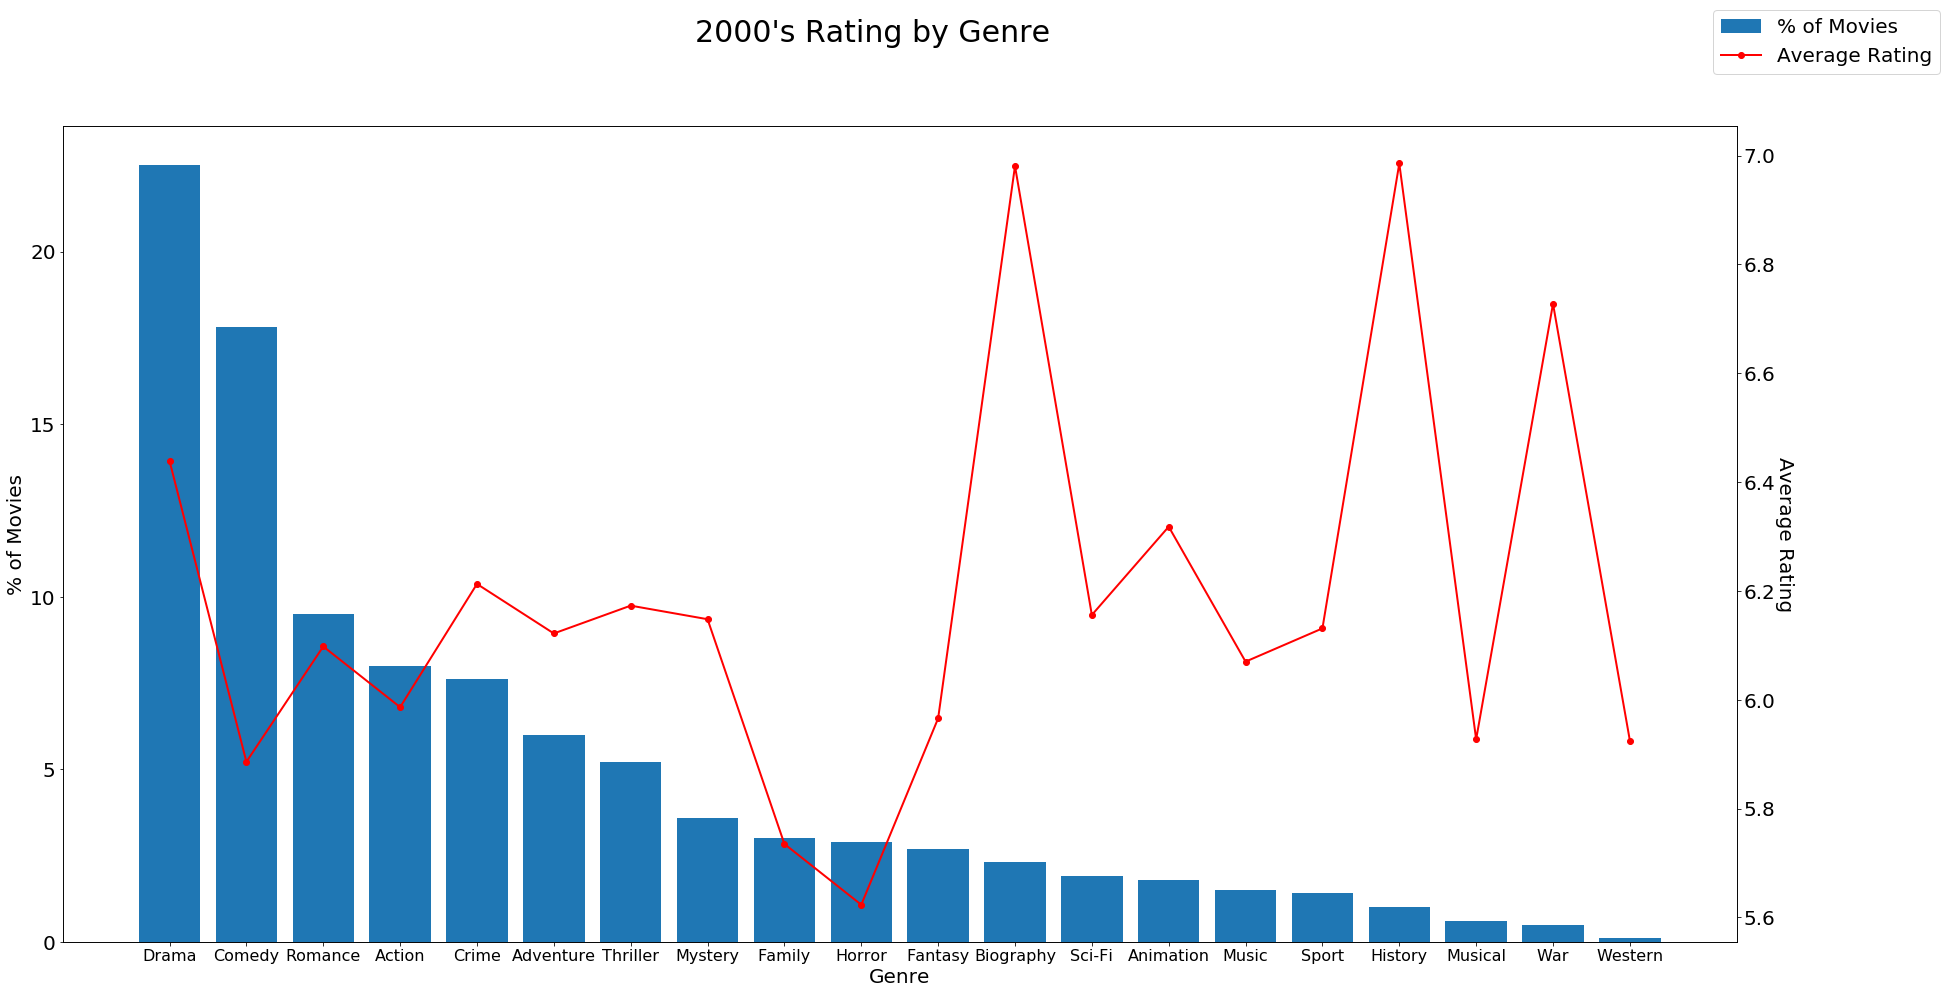

In [36]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_00_combined.index, decade_00_combined["%"], label='% of Movies')
ax2.plot(decade_00_combined.index, decade_00_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("2000's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_00_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 2010's Ratings by Genre

In [37]:
decade_10_combined = pd.concat([decade_10_df, rating_10_df], axis=1)
decade_10_combined[['%', "Avg Rating"]]
decade_10_combined

,Decade,%,Avg Rating
Drama,1178,23.30,6.34
Comedy,803,15.90,6.00
Action,521,10.30,6.09
Romance,350,6.90,6.13
Thriller,344,6.80,5.88
Adventure,326,6.40,6.38
Crime,296,5.90,6.18
Horror,200,4.00,5.41
Biography,193,3.80,6.89
Mystery,155,3.10,5.99


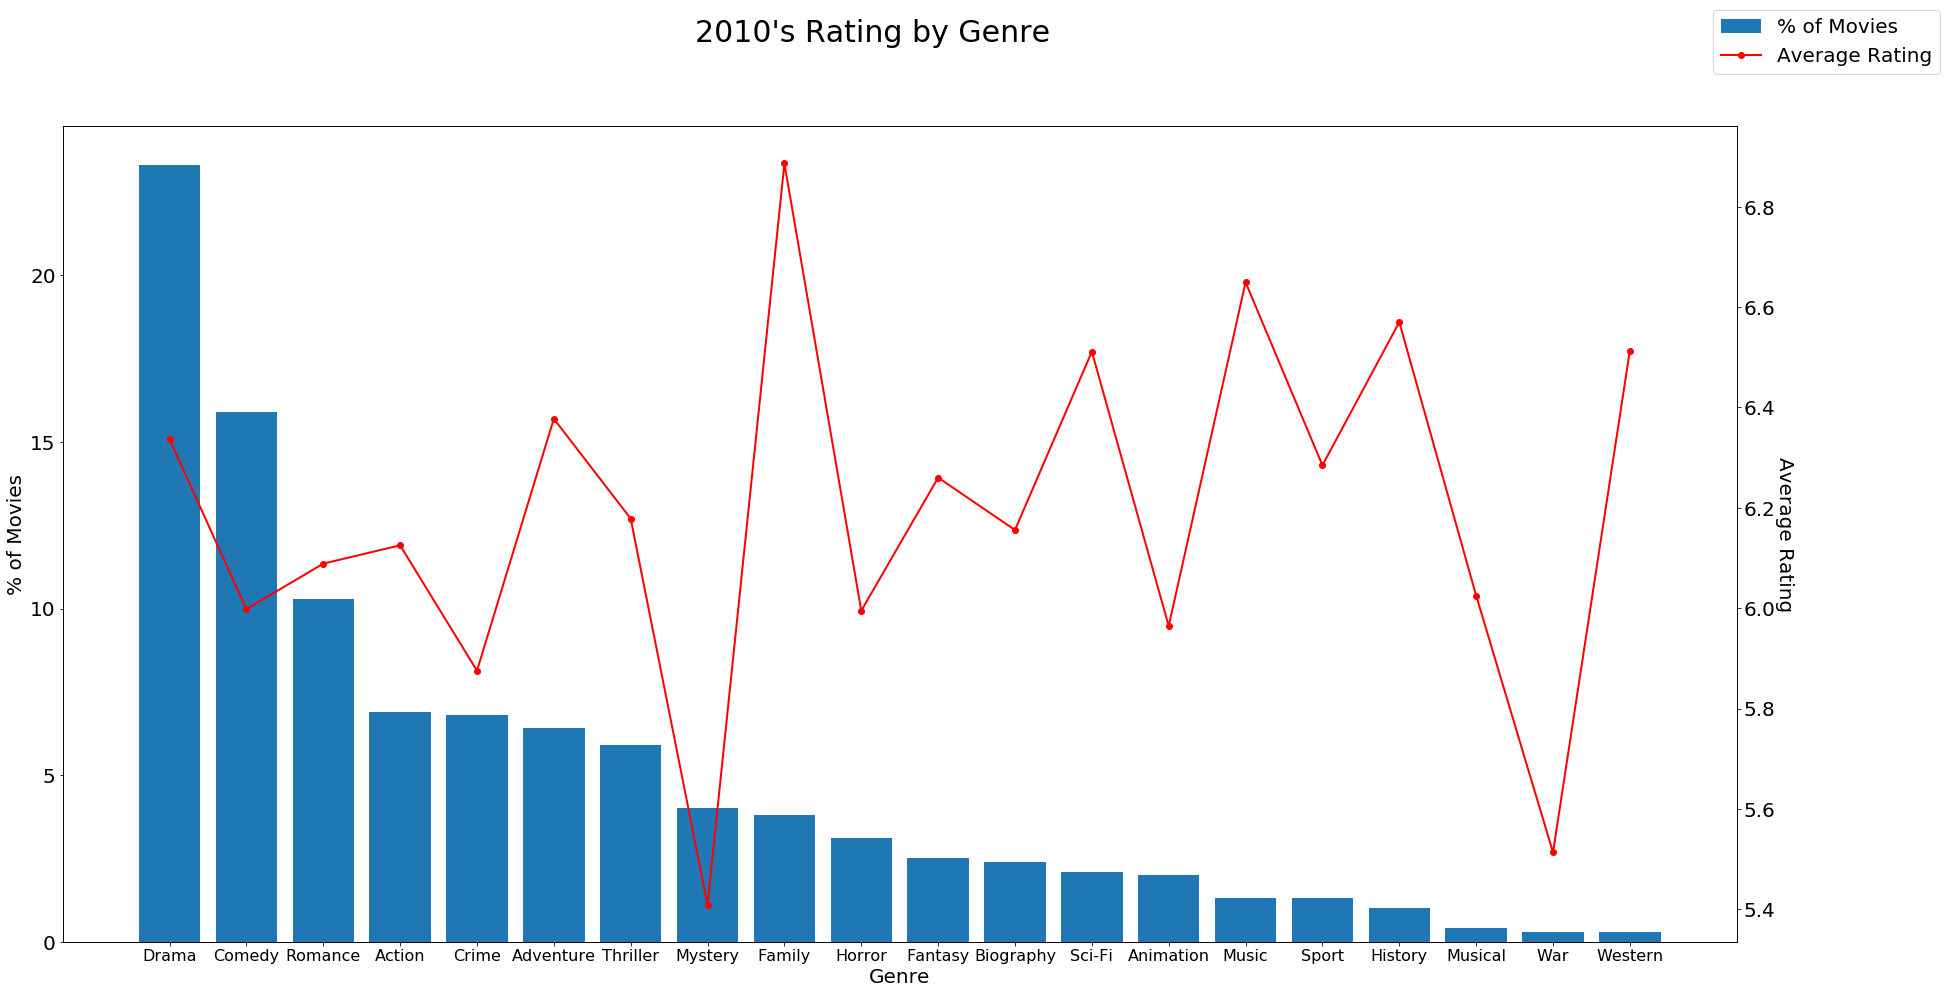

In [38]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_10_combined.index, decade_10_combined["%"], label='% of Movies')
ax2.plot(decade_10_combined.index, decade_10_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("2010's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_00_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

## Average Rating Over Time

In [39]:
# Create one DataFrame with data from 1970-2019
narrowed_genre = (movie_stacked[(movie_stacked['Decade'] == '1970-1979') | (movie_stacked['Decade'] == '1980-1989')
                                     | (movie_stacked['Decade'] == '1990-1999') | (movie_stacked['Decade'] == '1990-1999')
                                     | (movie_stacked['Decade'] == '2000-2009') | (movie_stacked['Decade'] == '2010-2019')])

# Group data by Decade & Genre
popular_ratings = (narrowed_genre[(narrowed_genre['Genre'] == 'Drama') | (narrowed_genre['Genre'] == 'Comedy')
                                     | (narrowed_genre['Genre'] == 'Romance') | (narrowed_genre['Genre'] == 'Action')
                                     | (narrowed_genre['Genre'] == 'Crime') | (narrowed_genre['Genre'] == 'Adventure')
                                  | (narrowed_genre['Genre'] == 'Thriller')])


popular_ratings_groupby = popular_ratings.groupby(['Decade', 'Genre'])['Avg Rating'].mean().unstack().dropna(how='any')

# Export file as csv
popular_ratings_groupby.to_csv(r'Data\popular_ratings.csv', index=True)

# Study data files
popular_ratings_path = "Data/popular_ratings.csv"

# Read the data and the study results
popular_ratings_df = pd.read_csv(popular_ratings_path, index_col=0)
popular_ratings_df


,Action,Adventure,Comedy,Crime,Drama,Romance,Thriller
Decade,,,,,,,
1970-1979,6.46,6.52,6.51,7.07,6.78,6.39,6.76
1980-1989,5.99,6.20,6.01,6.18,6.39,6.15,6.06
1990-1999,5.95,6.10,6.03,6.29,6.50,6.26,6.22
2000-2009,5.99,6.12,5.89,6.21,6.44,6.10,6.17
2010-2019,6.09,6.38,6.00,6.18,6.34,6.13,5.88


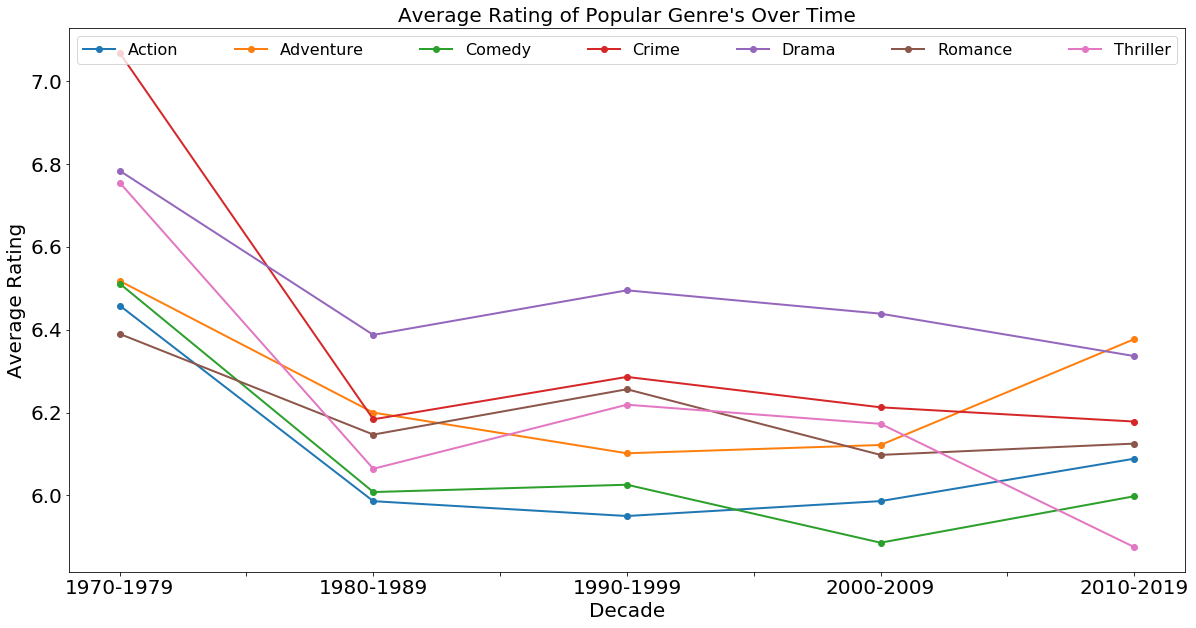

In [40]:
# Plot bar chart
ax = popular_ratings_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o', linewidth=2)


ax.legend(loc="best", mode = "expand", ncol = 10, fontsize=16)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Average Rating', fontsize=20)
plt.title("Average Rating of Popular Genre's Over Time", fontsize=20)


plt.show()

## Popular Genres Over Time

In [41]:
# Group data by Decade/Genre and create data frame
genre_combined_groupby = narrowed_genre.groupby(['Decade', 'Genre']).count().unstack().dropna(how='any')
genre_combined = pd.DataFrame(genre_combined_groupby)
genre_combined=genre_combined['IMDB ID']


# Export file as csv
genre_combined.to_csv(r'Data\genre_combined.csv', index=True)

# Study data files
genre_combined_path = "Data/genre_combined.csv"

# Read the data and the study results
genre_combined_df = pd.read_csv(genre_combined_path, index_col=0)


# Turn rows into percentages
genre_combined_df[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']] = genre_combined_df[['Action', 
                   'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']].apply(lambda x: x/x.sum(), axis=1).multiply(100)

# Display DataFrame
genre_combined_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Decade,,,,,,,,,,,,,,,,,,,,
1970-1979,7.17,6.82,0.52,1.57,15.21,6.64,23.95,2.80,1.22,0.87,2.27,1.92,1.40,3.67,6.99,3.32,2.97,6.64,2.27,1.75
1980-1989,8.82,5.73,0.74,1.80,18.53,8.14,21.04,1.67,3.19,0.93,4.70,1.87,0.80,2.90,7.88,2.83,1.32,5.60,1.13,0.39
1990-1999,7.77,5.10,0.87,1.99,19.02,8.76,23.85,3.29,2.51,0.85,2.58,1.33,0.30,2.72,8.80,2.17,1.12,5.99,0.66,0.32
2000-2009,8.04,5.97,1.83,2.27,17.81,7.62,22.53,2.99,2.73,1.01,2.91,1.47,0.60,3.59,9.49,1.91,1.36,5.20,0.53,0.15
2010-2019,10.31,6.45,2.14,3.82,15.89,5.86,23.30,2.00,2.41,1.29,3.96,1.29,0.30,3.07,6.92,2.47,1.05,6.81,0.40,0.30


In [42]:
genre_final = genre_combined_df[['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Romance', 'Thriller']]

# Export file as csv
genre_final.to_csv(r'Data\genre_final.csv', index=True)

# Study data files
genre_final_path = "Data/genre_final.csv"

# Read the data and the study results
genre_final_df = pd.read_csv(genre_final_path, index_col=0)

genre_final_df

,Action,Adventure,Comedy,Crime,Drama,Romance,Thriller
Decade,,,,,,,
1970-1979,7.17,6.82,15.21,6.64,23.95,6.99,6.64
1980-1989,8.82,5.73,18.53,8.14,21.04,7.88,5.60
1990-1999,7.77,5.10,19.02,8.76,23.85,8.80,5.99
2000-2009,8.04,5.97,17.81,7.62,22.53,9.49,5.20
2010-2019,10.31,6.45,15.89,5.86,23.30,6.92,6.81


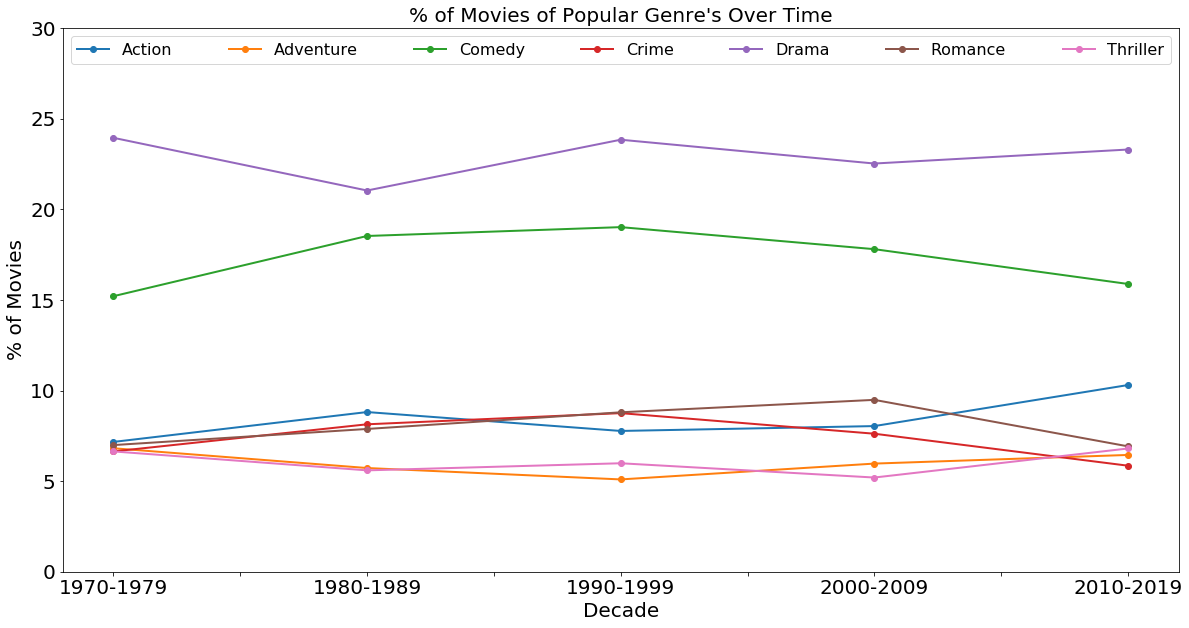

In [43]:
# Plot bar chart

ax = genre_final_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o', linewidth=2)


plt.legend(loc="upper center", mode = "expand", ncol = 10, fontsize=16)
plt.ylim(0.0, 30.0)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
plt.title("% of Movies of Popular Genre's Over Time", fontsize=20)


plt.show()